# Foundational Mathematics for AI

## Assignment 7 - Unsupervised Learning: Dimensionality Reduction and Clustering

In this notebook, we will learn how to apply unsupervised learning techniques with the Iris dataset. In particular, we will apply:

* Principal Component Analysis (PCA) to identify and visualize the principal components of the Iris dataset.

* The $K$-means clustering algorithm to cluster the dataset, using the elbow rule to choose the best value of $K$.

* We will also use relevant performance metrics to evaluate the obtained clusters, and compare the clusters to the actual labels from the dataset.

**YOUR TURN**

Load the Iris dataset.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()  # load the dataset
X = iris.data       # extract feature vectors
y = iris.target     # extract labels

We will now be using Principal Component Analysis (PCA), which is a dimensionality reduction technique, to identify the first three principal components of the Iris dataset.

*Hint*: Popular methods such as PCA often have a ready-to-use implementation from the `sklearn.decomposition` package.

In [2]:
from sklearn.decomposition import PCA

# Compute the first 3 principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

**YOUR TURN**

Visualize the true clusters of the Iris Dataset using the 3 principal components computed above.

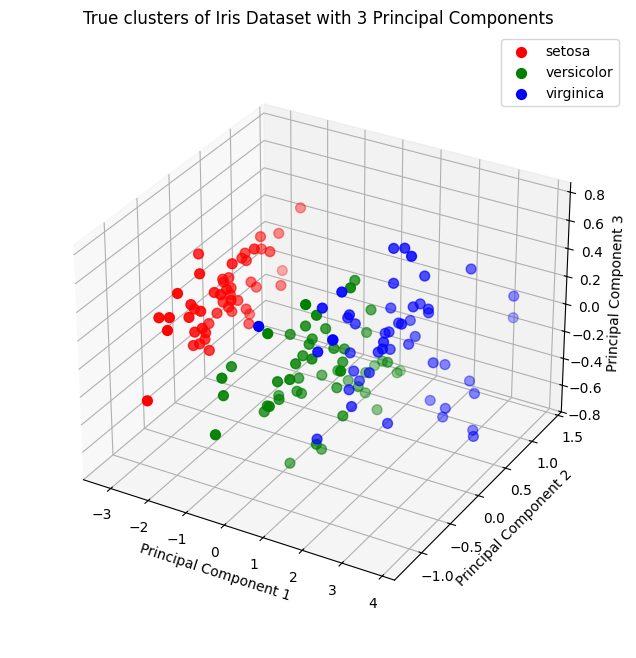

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Create a DataFrame for easier plotting
df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = iris.target_names
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = df['target'] == iris.target_names.tolist().index(target)
    ax.scatter(df.loc[indicesToKeep, 'PC1'],
               df.loc[indicesToKeep, 'PC2'],
               df.loc[indicesToKeep, 'PC3'],
               c=color,
               s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('True clusters of Iris Dataset with 3 Principal Components')
ax.legend(targets)
ax.grid()
ax.set_box_aspect(None, zoom=0.9)
plt.show()

**YOUR TURN**

(a) Apply the K-means clustering algorithm to the Iris dataset using the best value of $K$. What is this optimal value of $K$? How did you choose it?

(b) Visualize the obtained clusters in 3D space.

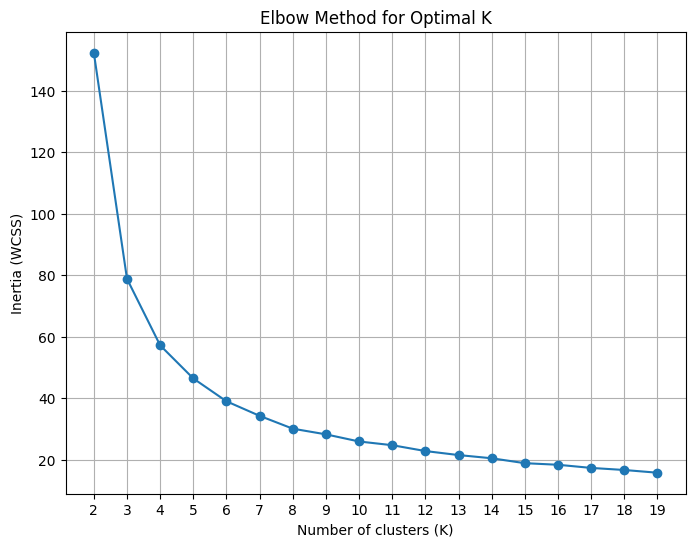

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
end_k = 20
for k in range(2, end_k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, end_k), inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(2, end_k))
plt.grid(True)
plt.show()


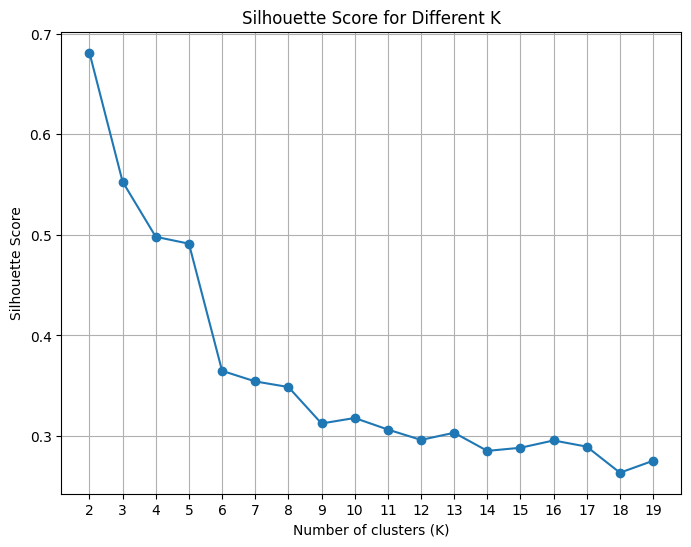

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, end_k), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.xticks(range(2, end_k))
plt.grid(True)
plt.show()

From the Elbow Method plot, we look for the "elbow point", which is the point where the rate of decrease in inertia slows down significantly. In this case, the elbow appears to be at K=3.

From the Silhouette Score plot, we look for the peak value. The highest silhouette score is achieved at K=2. However, the within cluster sum of squares (WCSS) is too low and when K=3, the silhouette score is decent.

Therefore, the optimal value of K is 3. This aligns with our knowledge of the Iris dataset, which has 3 known classes.

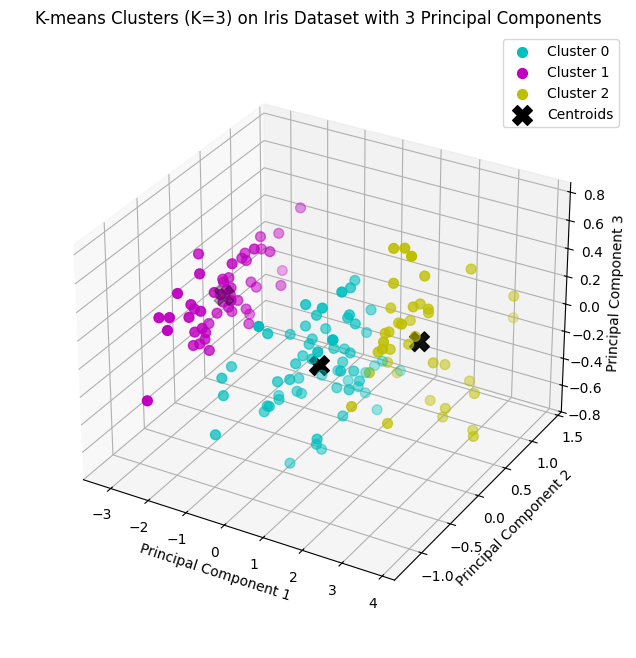

In [6]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

df_clustered = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_clustered['cluster'] = clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

cluster_labels = sorted(df_clustered['cluster'].unique())
colors = ['c', 'm', 'y'] # Use different colors for clustered visualization

for cluster_label, color in zip(cluster_labels, colors):
    indicesToKeep = df_clustered['cluster'] == cluster_label
    ax.scatter(df_clustered.loc[indicesToKeep, 'PC1'],
               df_clustered.loc[indicesToKeep, 'PC2'],
               df_clustered.loc[indicesToKeep, 'PC3'],
               c=color,
               s=50, label=f'Cluster {cluster_label}')

# Visualize centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2],
           marker='X', s=200, c='k', label='Centroids')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'K-means Clusters (K={optimal_k}) on Iris Dataset with 3 Principal Components')
ax.legend()
ax.grid()
ax.set_box_aspect(None, zoom=0.9)
plt.show()

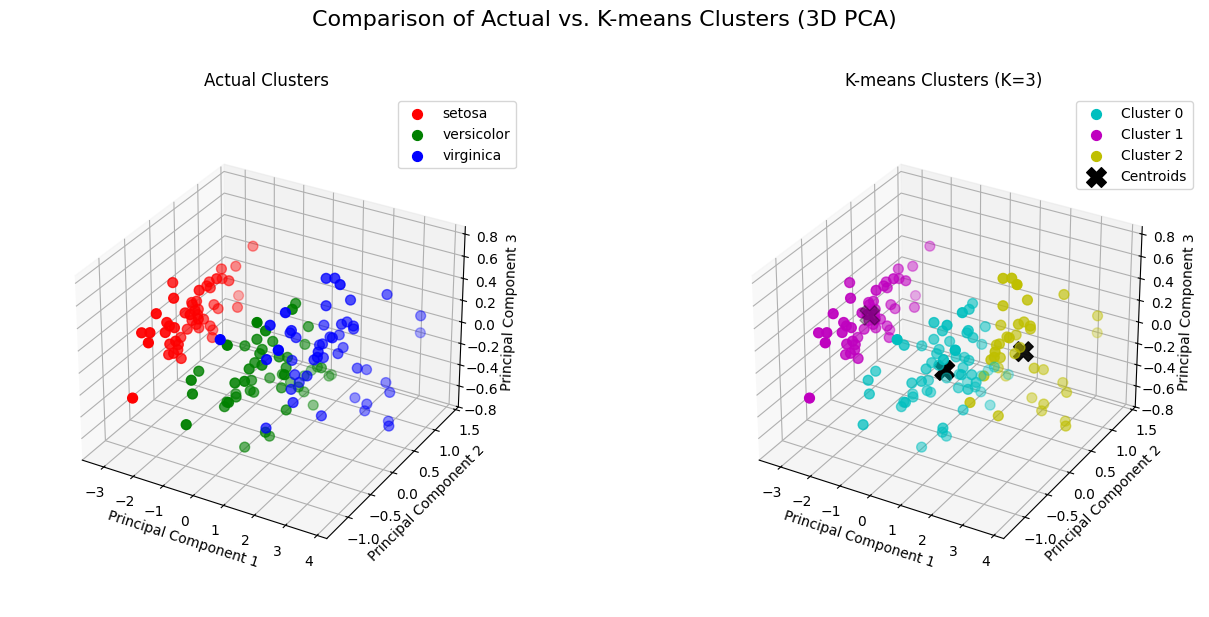

In [7]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
targets = iris.target_names
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = df['target'] == iris.target_names.tolist().index(target)
    ax1.scatter(df.loc[indicesToKeep, 'PC1'],
                df.loc[indicesToKeep, 'PC2'],
                df.loc[indicesToKeep, 'PC3'],
                c=color,
                s=50)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.set_title('Actual Clusters')
ax1.legend(targets)
ax1.grid()
ax1.set_box_aspect(None, zoom=0.85)

ax2 = fig.add_subplot(122, projection='3d')
cluster_labels = sorted(df_clustered['cluster'].unique())
colors = ['c', 'm', 'y']
for cluster_label, color in zip(cluster_labels, colors):
    indicesToKeep = df_clustered['cluster'] == cluster_label
    ax2.scatter(df_clustered.loc[indicesToKeep, 'PC1'],
                df_clustered.loc[indicesToKeep, 'PC2'],
                df_clustered.loc[indicesToKeep, 'PC3'],
                c=color,
                s=50, label=f'Cluster {cluster_label}')

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
ax2.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2],
            marker='X', s=200, c='k', label='Centroids')

ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.set_title(f'K-means Clusters (K={optimal_k})')
ax2.legend()
ax2.grid()
ax2.set_box_aspect(None, zoom=0.85)

plt.suptitle('Comparison of Actual vs. K-means Clusters (3D PCA)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

**YOUR TURN**

Evaluate the quality of your obtained clusters using an appropriate performance metric, and write a sentence or two to explain your results.

In [8]:
silhouette_avg = silhouette_score(X, clusters)
print(f"The Silhouette Score for the K-means clustering with K={optimal_k} is: {silhouette_avg:.4f}")

The Silhouette Score for the K-means clustering with K=3 is: 0.5528


### Explanation of the results
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.

A score close to 1 indicates that the data point is far away from the neighboring clusters and close to its own cluster, suggesting well-separated clusters.

A score near 0 indicates overlapping clusters, and a negative score indicates that data points might have been assigned to the wrong cluster.

A Silhouette Score of 0.5528 suggests that the clusters are reasonably well-separated, but there is some overlap, which aligns visually with the 3D scatter plot.